## Part 1: Convolution

In [29]:
%run ../config/toolchain/importlibs.py

(96, 96)


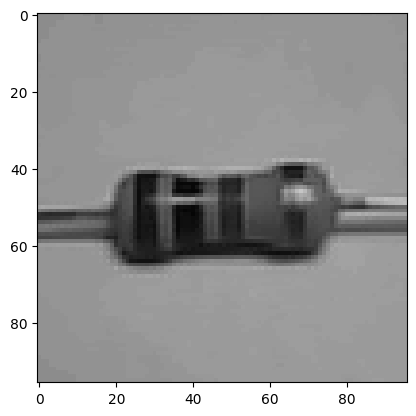

In [30]:
### example image
DATAPATH = "../data/raw/electronic-components-bmp/resistor/0.bmp"

### Open and view image
# Use PIL to open the image and convert it to grayscale
img = PIL.Image.open(DATAPATH)
img = img.convert('L')

# Convert image to Numpy array
img = np.asarray(img)

# Show dimensions and view array as image
print(img.shape)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [31]:
### Convolution function

def convolve(img, kernel, stride):

  # Compute dimensions of output image
  out_height = math.floor((img.shape[0] - kernel.shape[0]) / stride) + 1
  out_width = math.floor((img.shape[1] - kernel.shape[1]) / stride) + 1
  
  # Create blank output image
  convolved_img = np.zeros((out_height, out_width))

  # Loop through each pixel in the output array. Note that this is not the most efficient way of
  # doing convolution, but it provides some insights into what's going on.
  for i in np.arange(0, out_height):
    for j in np.arange(0, out_width):

      # Set a temporary variable to 0
      accumulator = 0

      # Do element-wise multiplication and sum the result over the window/kernel
      for m in np.arange(0, kernel.shape[0]):
        for n in np.arange(0, kernel.shape[1]):
          accumulator += img[(stride * i) + m, (stride * j) + n] * kernel[m, n]

      # Set output image pixel to accumulator value
      convolved_img[i, j] = accumulator  

  # Round all elements, convert to integers, and clamp to values between 0 and 255
  convolved_img = np.rint(convolved_img).astype(int)
  convolved_img = np.clip(convolved_img, 0, 255)

  return convolved_img

(94, 94)


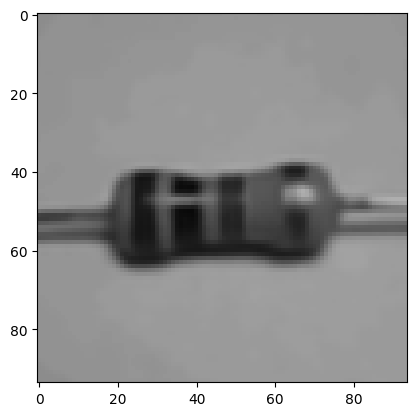

In [32]:
### Test 1: Gaussian blur filter

# Define kernel
kernel = np.array([[1/16, 2/16, 1/16],
                   [2/16, 4/16, 2/16],
                   [1/16, 2/16, 1/16]])

# Call your convolve function (with a stride of 1)
out_img = convolve(img, kernel, 1)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

(94, 94)


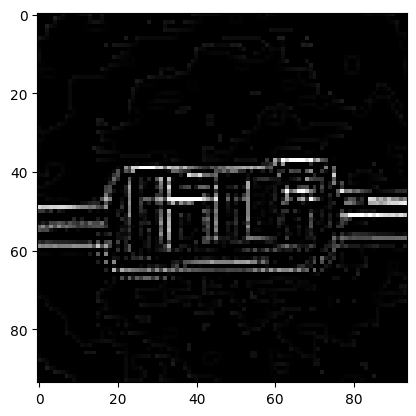

In [33]:
### Test 2: Edge detection

# Define kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Call your convolve function (with a stride of 1)
out_img = convolve(img, kernel, 1)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

(47, 47)


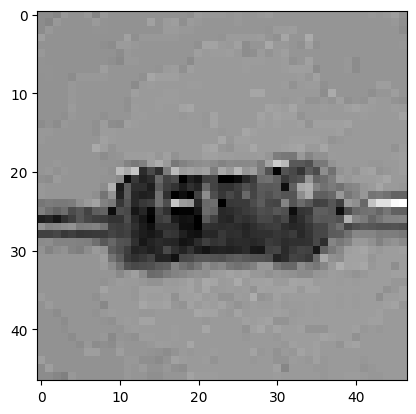

In [34]:
### Test 3: Sharpen with stride > 1

# Define kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Call your convolve function (with a stride of 2)
out_img = convolve(img, kernel, 2)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

## Part 2: Pooling


In [35]:
### Max pooling function

def maxpooling(img, pool_height, pool_width):

  # Set stride amounts
  stride_y = pool_height
  stride_x = pool_width

  # Compute dimensions of output image
  out_height = math.floor((img.shape[0] - pool_height) / stride_y) + 1
  out_width = math.floor((img.shape[1] - pool_width) / stride_x) + 1
  
  # Create blank output image
  pooled_img = np.zeros((out_height, out_width))

  # >>> ENTER YOUR CODE HERE <<<

  # Loop through each pixel in the output array. Note that this is not the most efficient way of
  # doing convolution, but it provides some insights into what's going on.
  for i in np.arange(0, out_height):
    for j in np.arange(0, out_width):

      # Set output to the value of the first element in the window
      out_val = img[(stride_y * i), (stride_x * j)]

      # Look through each element in the window to find the max value
      for m in np.arange(0, pool_height):
        for n in np.arange(0, pool_width):
          out_val = max(out_val, img[(stride_y * i) + m, (stride_x * j) + n])

      # Set element in output array to max value
      pooled_img[i, j] = out_val

  # Round all elements, convert to integers, and clamp to values between 0 and 255
  pooled_img = np.rint(pooled_img).astype(int)
  pooled_img = np.clip(pooled_img, 0, 255)

  return pooled_img

(48, 32)


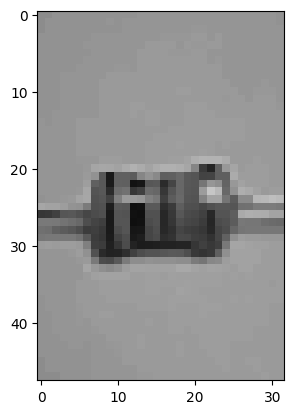

In [36]:
### Test 1: Max pool original image with pool size of (2, 3)

# Call your pooling function (with pool_size=(2, 3))
out_img = maxpooling(img, 2, 3)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)

(47, 47)


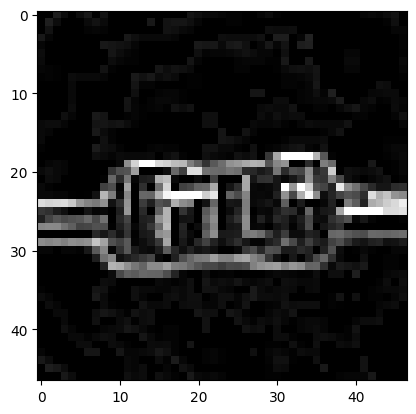

In [37]:
### Test 2: Detect edges and pool

# Define kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# Call your convolve function (with a stride of 1)
convolved_img = convolve(img, kernel, 1)

# Call your pooling function (with pool_size=(2, 2))
out_img = maxpooling(convolved_img, 2, 2)

# Show dimensions and view array as image
print(out_img.shape)
plt.imshow(out_img, cmap='gray', vmin=0, vmax=255)